Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [12]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [4]:
# Load the Titanic dataset
titanic_df = pd.read_csv('train.csv')

titanic_df.info()

print(titanic_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                           

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

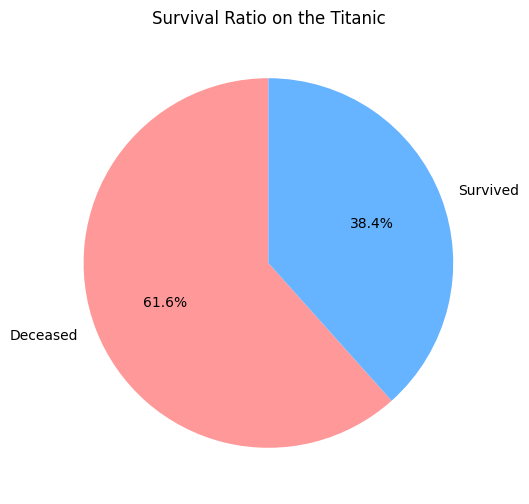

In [8]:
# Calculate the number of survivors and deceased
survival_counts = titanic_df['Survived'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Deceased', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Survival Ratio on the Titanic')
plt.show()

The pie chart visualization effectively illustrates the Titanic disaster, highlighting the survival ratio between those who survived and those who perished. The visual representation shows a significant proportion of passengers who did not survive the tragedy.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


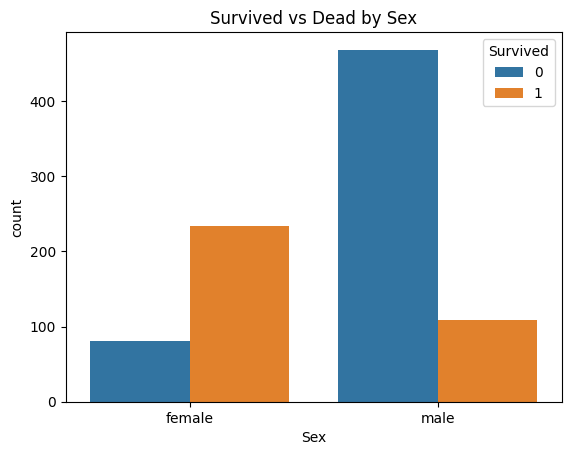

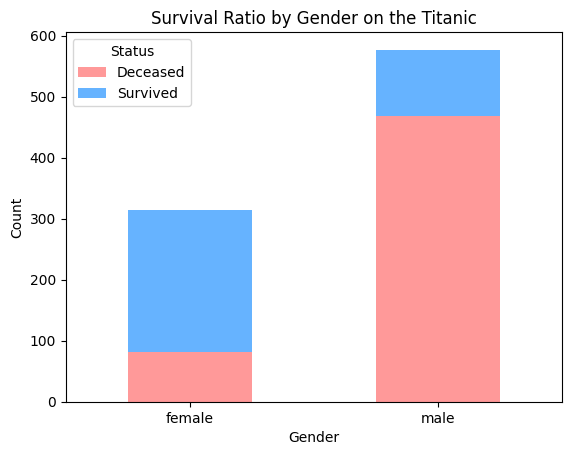

In [9]:
gender_survival_counts = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()

pivot_df = gender_survival_counts.pivot(index='Sex', columns='Survived', values='size')

# Plotting the bar chart
pivot_df.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Survival Ratio by Gender on the Titanic')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Deceased', 'Survived'], title='Status')
plt.show()

The stacking of bars for deceased and survived passengers within each gender category allows for an easy visual assessment of the proportion of survivors to deceased.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

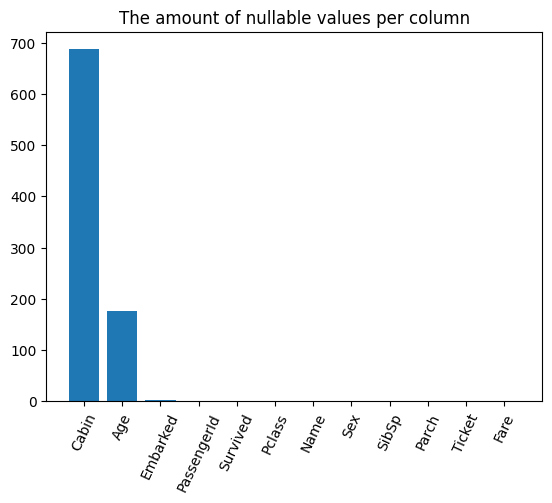

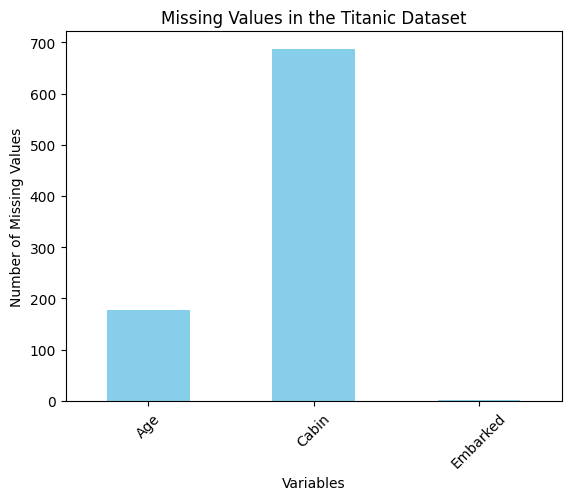

In [10]:
missing_values = titanic_df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in the Titanic Dataset')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

*прокоментуйте отримані візуалізації From the visualization, we can easily discern which features are the most incomplete, such as Cabin, and which have relatively fewer missing values, like Age and Embarked. This information is crucial for data preprocessing steps, as it influences decisions on handling missing data

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

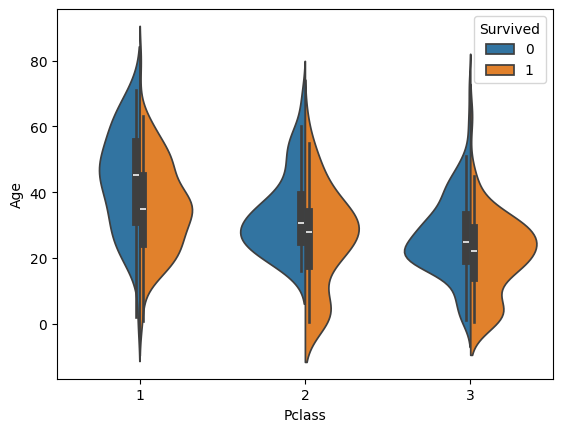

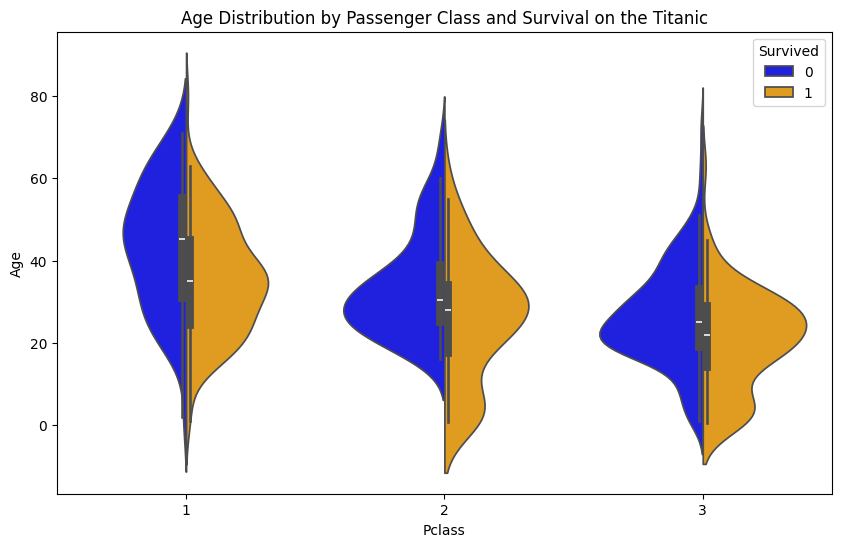

In [14]:


plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: "blue", 1: "orange"})

plt.title('Age Distribution by Passenger Class and Survival on the Titanic')

plt.show()


*прокоментуйте отримані візуалізації
Each violin represents the kernel density estimation of the age distribution for the passengers in that group. The wider sections of the violin suggest a higher density of passengers in that age range, while the thinner sections indicate fewer passengers.



6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


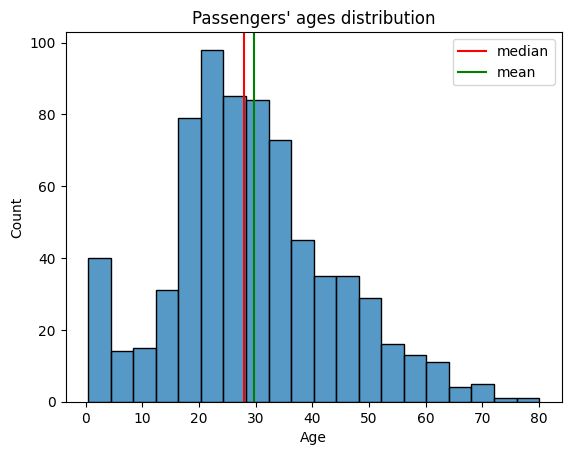

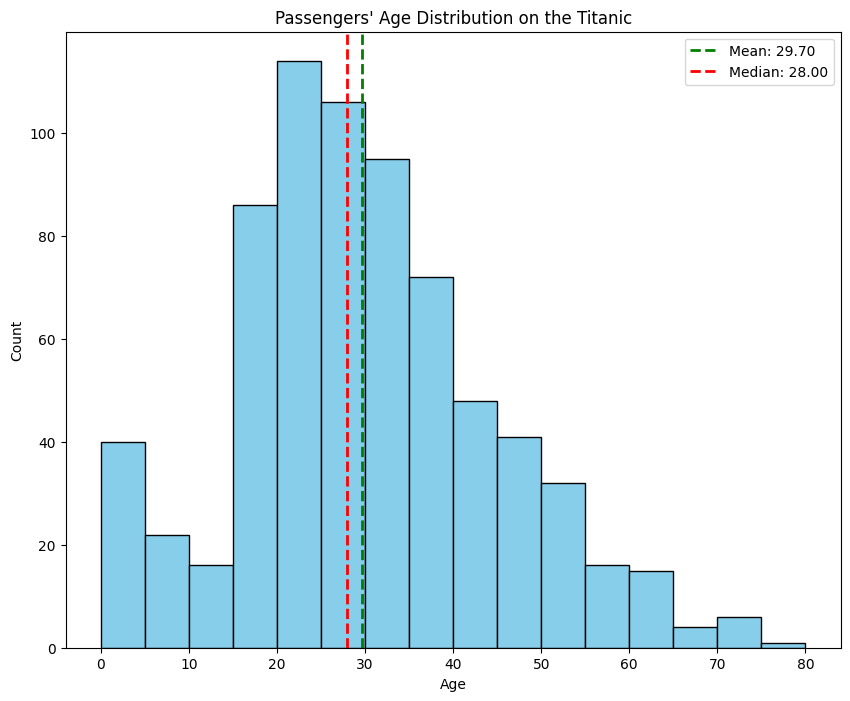

In [15]:

plt.figure(figsize=(10, 8))
plt.hist(titanic_df['Age'].dropna(), bins=range(0, 81, 5), color='skyblue', edgecolor='black')


age_mean = titanic_df['Age'].mean()
age_median = titanic_df['Age'].median()

plt.axvline(age_mean, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {age_mean:.2f}')
plt.axvline(age_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {age_median:.2f}')


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passengers\' Age Distribution on the Titanic')
plt.legend()


plt.show()

The age distribution appears to indicate a younger passenger demographic overall, with a notable peak in the 20 to 30 age. This peak suggests that the majority of passengers were young adults.




7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи була значна різниця в рівнях виживання між різними класами пасажирів на Титаніку?

<ipython-input-16-9541be9875b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Blues_d')


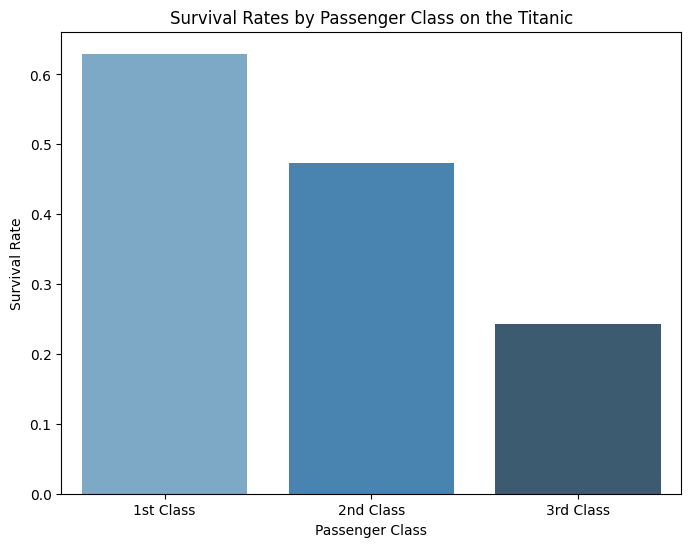

In [16]:
survival_rates = titanic_df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='Blues_d')

plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class on the Titanic')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])  # Rename x-ticks for clarity

plt.show()

The resulting bar chart would likely show that the first-class passengers had the highest survival rate, followed by the second-class, and then the third-class passengers. This outcome suggests that socio-economic status played a significant role in survival chances during the sinking of the Titanic, likely due to better access to lifeboats and other safety measures among the upper classes. This visualization can lead to discussions about the importance of equitable safety measures and procedures in the context of the hospitality and travel industries.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

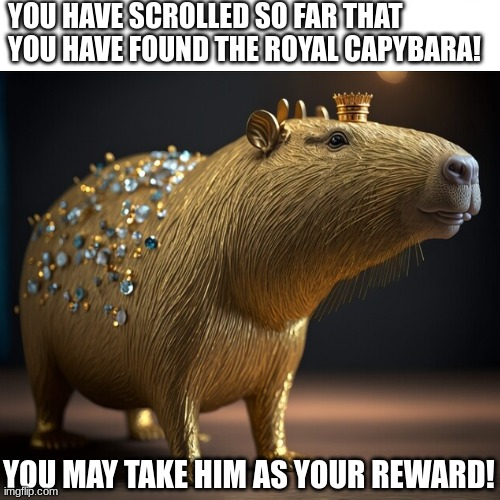